Throughout this Notebook CIFAR10 Dataset is used. You can find the dataset in the following link as well.

[CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

# Part 2

Code a two-layer fully connected network with H = 200 hidden nodes. Choose the sigmoid function as
the activation function for the hidden nodes. The output layer has no activation function.

(a) Implement gradient descent and run for 300 epochs.

(b) Report the (initial) learning rate, training and testing loss and accuracies.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
def find_accuracy(pred,labels):
    pred_class = np.argmax(pred, axis=1)
    ground_truth = np.argmax(labels, axis=1)
    accurate_pred = [pred_class == ground_truth]
    return 100*np.sum(accurate_pred)/len(ground_truth)

In [4]:
epochs = 300
lr = 0.015
lr_decay=0.999
reg = 5e-5
batch_size = Ntr
val_batch_size = Nte
loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

In [5]:
#Weight Initialising
std=1e-5
w1 = std*np.random.randn(Din, 200)
b1 = np.zeros(200)

w2 = std*np.random.randn(200, 10)
b2 = np.zeros(10)

print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [6]:
for t in range(1,epochs+1):
  indices = np.arange(Ntr)
  rng.shuffle(indices)

  x = x_train[indices]
  y = y_train[indices]

  h = 1./(1.+np.exp(-(x.dot(w1)+b1)))
  y_pred = h.dot(w2)+b2

  loss = 1./(batch_size*2)*np.square(y_pred-y).sum() + reg/(batch_size*2)*(np.sum(w1*w1)+np.sum(w2*w2))
  loss_history.append(loss)

  train_acc = find_accuracy(y_pred, y)
  train_acc_history.append(train_acc)

  h_val = 1./(1.+np.exp(-(x_test.dot(w1)+b1)))
  y_pred_val = h_val.dot(w2)+b2

  val_loss = 1./(val_batch_size*2)*np.square(y_pred_val-y_test).sum()
  val_loss_history.append(val_loss)

  val_acc = find_accuracy(y_pred_val, y_test)
  val_acc_history.append(val_acc)

  

  if t%10==0 or t == epochs:
    print('Epoch %d/%d: Train Loss: %f, Val Loss: %f,  Training Accuracy: %f, Validation Accuracy: %f'%(t, epochs,loss,val_loss, train_acc, val_acc))
    
  dy = 1.0/batch_size*(y_pred-y)

  dw2 = h.T.dot(dy) + 1./batch_size*reg*w2
  w2 -= lr*dw2

  db2 = dy.sum(axis = 0)
  b2 -= lr*db2

  dh = dy.dot(w2.T)

  dw1 = x.T.dot(dh*h*(1-h)) + 1./batch_size*reg*w1
  w1 -= lr*dw1

  db1 = (dh*h*(1-h)).sum(axis =0)
  b1 -= lr*db1
  
  lr *= lr_decay


  

Epoch 10/300: Train Loss: 0.437175, Val Loss: 0.437003,  Training Accuracy: 16.722000, Validation Accuracy: 16.690000
Epoch 20/300: Train Loss: 0.424730, Val Loss: 0.424618,  Training Accuracy: 24.240000, Validation Accuracy: 24.210000
Epoch 30/300: Train Loss: 0.418313, Val Loss: 0.418181,  Training Accuracy: 28.822000, Validation Accuracy: 28.550000
Epoch 40/300: Train Loss: 0.415120, Val Loss: 0.415035,  Training Accuracy: 30.476000, Validation Accuracy: 30.510000
Epoch 50/300: Train Loss: 0.411444, Val Loss: 0.411494,  Training Accuracy: 32.600000, Validation Accuracy: 32.470000
Epoch 60/300: Train Loss: 0.408710, Val Loss: 0.408812,  Training Accuracy: 33.492000, Validation Accuracy: 33.680000
Epoch 70/300: Train Loss: 0.404723, Val Loss: 0.404953,  Training Accuracy: 35.324000, Validation Accuracy: 35.690000
Epoch 80/300: Train Loss: 0.403310, Val Loss: 0.403788,  Training Accuracy: 35.568000, Validation Accuracy: 35.380000
Epoch 90/300: Train Loss: 0.399254, Val Loss: 0.399946, 

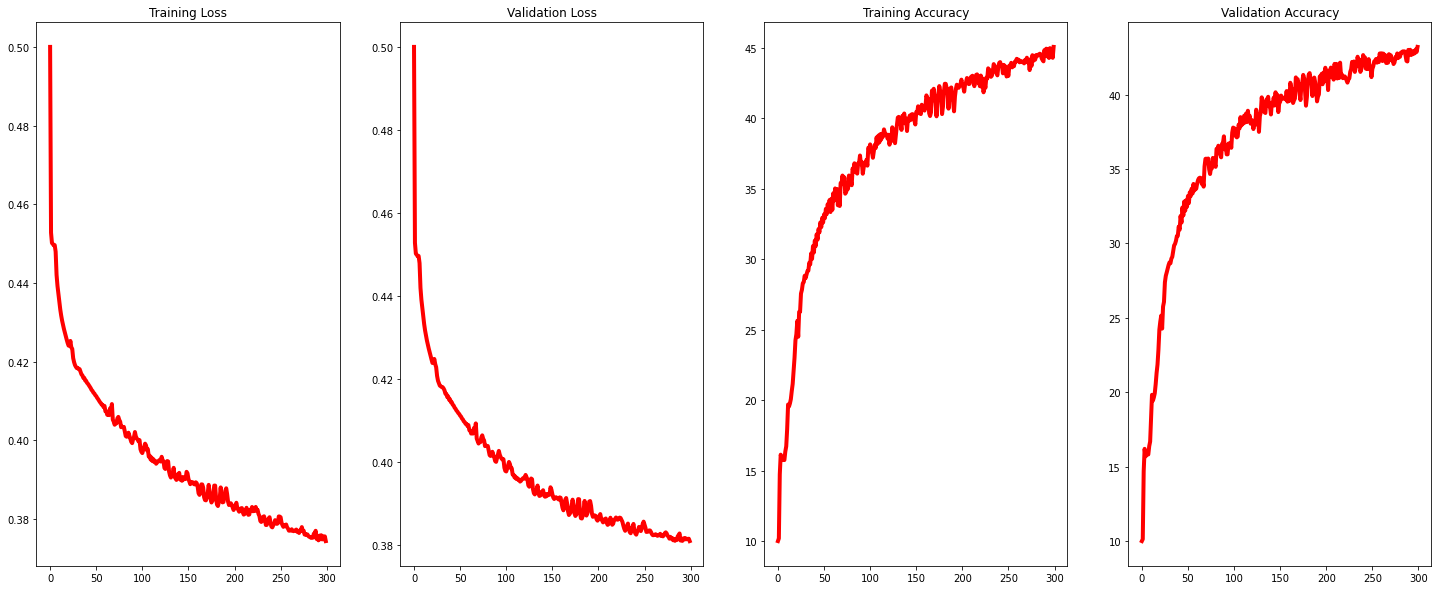

In [10]:
fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(25,10))
items = {"Training Loss":loss_history, "Validation Loss":val_loss_history, "Training Accuracy":train_acc_history, "Validation Accuracy": val_acc_history}
i = 1
for key in items.keys():
    plt.subplot(1,4,i);plt.plot(items[key], color ='r', linewidth=4)
    plt.title(key)
    i+=1

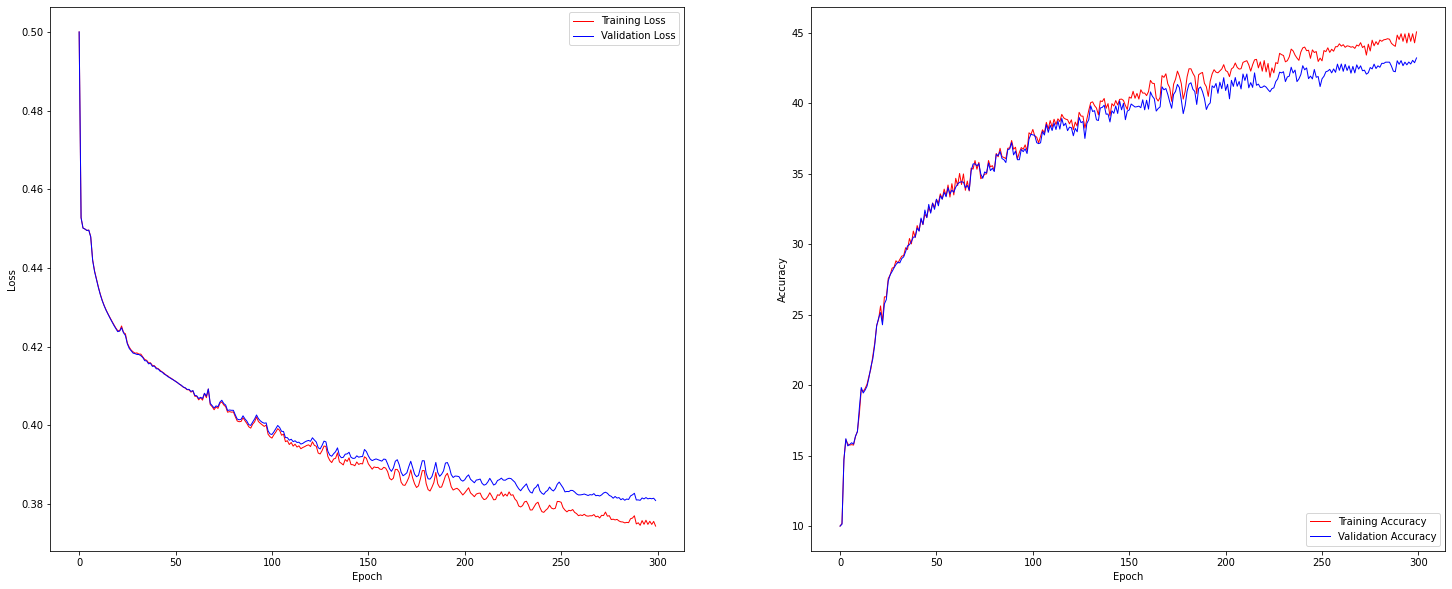

In [14]:
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(25,10))
items = {"Training Loss":loss_history, "Validation Loss":val_loss_history, "Training Accuracy":train_acc_history, "Validation Accuracy": val_acc_history}

plt.subplot(1,2,1);
plt.plot(items['Training Loss'], color ='r', linewidth=1, label ='Training Loss');
plt.plot(items['Validation Loss'], color ='b', linewidth=1, label = 'Validation Loss');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend(loc='upper right');

plt.subplot(1,2,2);
plt.plot(items['Training Accuracy'], color ='r', linewidth=1, label ='Training Accuracy');
plt.plot(items['Validation Accuracy'], color ='b', linewidth=1, label = 'Validation Accuracy');
plt.xlabel('Epoch');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.show()

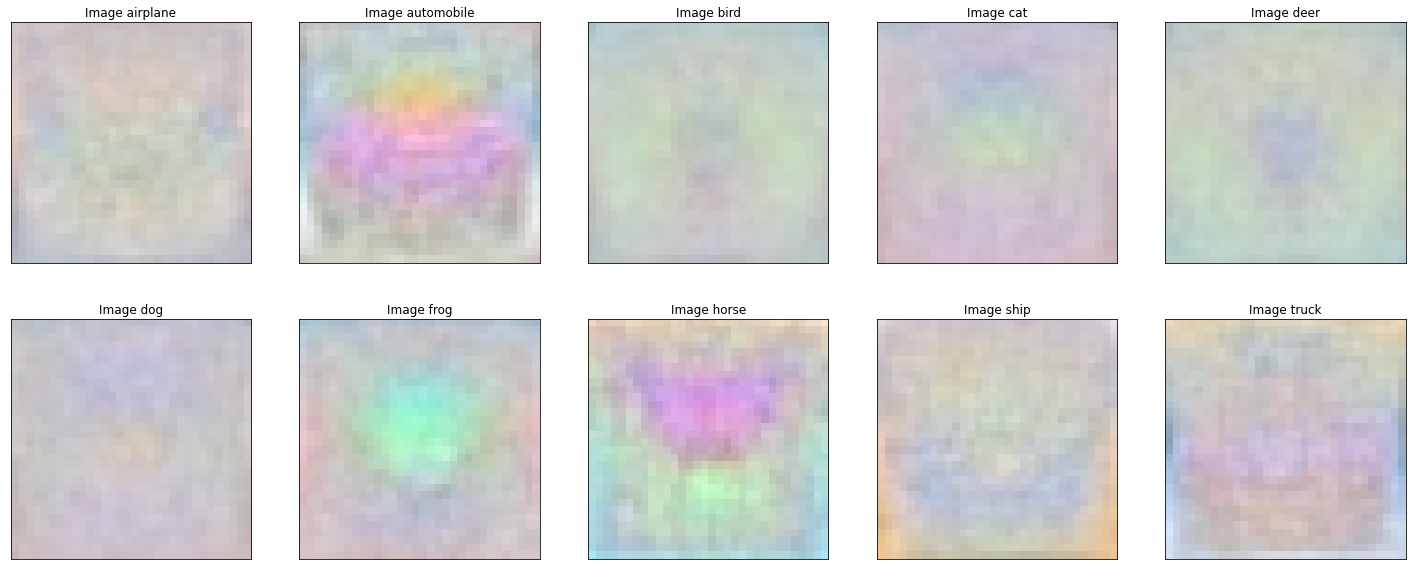

In [8]:
w = w1.dot(w2)
w =  w- np.min(w1)# Making the minimum weight zero.
images = ((w/np.max(w))*255).astype('uint8')
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
location = 1 # Location of the image in the grid of 2x5
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,location),plt.imshow(image[:,:,::-1])
    plt.title("Image "+ classes[i]),
    plt.xticks([])
    plt.yticks([])      
    location+=1

plt.show()